In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import plotly.graph_objects as go
import sklearn.tree as tree

df = pd.read_csv('CO2_Emissions_Canada.csv')

#duplicated data
df_duplicated = df[df.duplicated() == True]
indexs = df_duplicated.index
for i in indexs:
   df.drop(i, axis = 0,inplace = True)


In [2]:
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [3]:
df_Make=df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Count'})
df_Make.head(2)


,Make,Count
0,FORD,577
1,CHEVROLET,515


<AxesSubplot:xlabel='Count', ylabel='Make'>

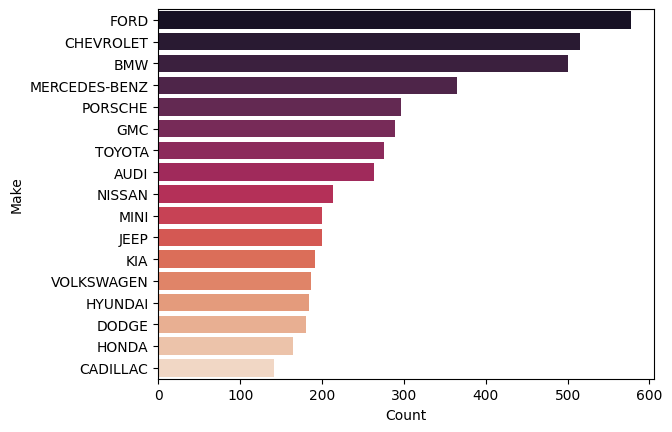

In [4]:
df_Make_x_f= df_Make[0:17]
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)
s = df_Make_x_f['Count']
sns.barplot(y='Make',x='Count',data= df_Make_x_f,palette=colors_from_values(s, "rocket_r"))


<AxesSubplot:xlabel='Count', ylabel='Transmission'>

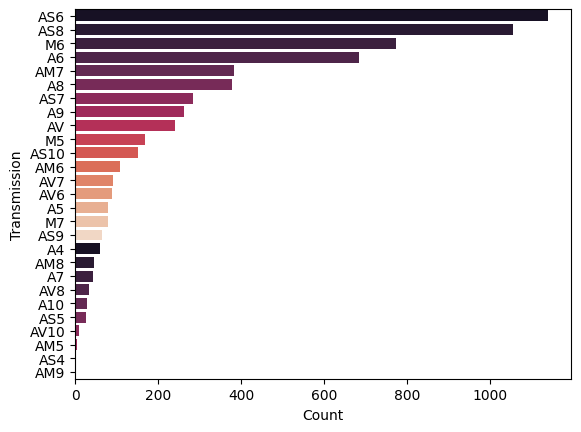

In [5]:
df_Transmission=df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Count'})

sns.barplot(y= 'Transmission',x= 'Count', data= df_Transmission, palette=colors_from_values(s, "rocket_r"))

In [6]:
df_Transmission=df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Count'})

fig = go.Figure(go.Bar(
    x=df_Transmission['Transmission'],y=df_Transmission['Count'],
    marker={'color': df_Transmission['Count'], 
    'colorscale': 'Viridis'},  
    text=df_Transmission['Count'],
    textposition = "outside",
))
fig.update_layout(title_text='Transmission Distribution ',xaxis_title="Transmission ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

## *Data Preprocessing*

In [7]:
df.head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [8]:
cdf = df[['Engine Size(L)','Cylinders','Transmission','Fuel Type','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
cdf.head(2)

,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221


x
<body>
Fuel type
X = Regular gasoline
Z = Premium gasoline
D = Diesel
E = Ethanol (E85)
N = Natural gas (none)

X 
Z 
D 
E 
N

In [9]:
Transmissionn = pd.get_dummies(cdf['Transmission'])
Transmissionn.head(5)

,A10,A4,A5,A6,A7,A8,A9,AM5,AM6,AM7,...,AS8,AS9,AV,AV10,AV6,AV7,AV8,M5,M6,M7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Fuel_Type = pd.get_dummies(cdf['Fuel Type'])
Fuel_Type.head(5)

,D,E,N,X,Z
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [11]:
df2 = pd.concat((cdf, Transmissionn), axis = 1)



In [12]:
df2 = pd.concat((df2, Fuel_Type), axis = 1)

In [13]:
df2 = df2.drop(['Transmission'], axis = 1)


In [14]:
df2 = df2.drop(['Fuel Type'], axis = 1)

In [15]:
df2.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),A10,A4,A5,...,AV7,AV8,M5,M6,M7,D,E,N,X,Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    6282 non-null   float64
 1   Cylinders                         6282 non-null   int64  
 2   Fuel Consumption City (L/100 km)  6282 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 5   Fuel Consumption Comb (mpg)       6282 non-null   int64  
 6   CO2 Emissions(g/km)               6282 non-null   int64  
 7   A10                               6282 non-null   uint8  
 8   A4                                6282 non-null   uint8  
 9   A5                                6282 non-null   uint8  
 10  A6                                6282 non-null   uint8  
 11  A7                                6282 non-null   uint8  
 12  A8    

In [17]:
df2['Z'] = df2['Z'].astype(float)
df2['X'] = df2['X'].astype(float)
df2['N'] = df2['N'].astype(float)
df2['E'] = df2['E'].astype(float)
df2['D'] = df2['D'].astype(float)
df2['M7'] = df2['M7'].astype(float)
df2['M6'] = df2['M6'].astype(float)
df2['M5'] = df2['M5'].astype(float)
df2['AV8'] = df2['AV8'].astype(float)
df2['AV7'] = df2['AV7'].astype(float)
df2['AV6'] = df2['AV6'].astype(float)
df2['AV10'] = df2['AV10'].astype(float)
df2['AV'] = df2['AV'].astype(float)
df2['AS9'] = df2['AS9'].astype(float)
df2['AS8'] = df2['AS8'].astype(float)
df2['AS7'] = df2['AS7'].astype(float)
df2['AS6'] = df2['AS6'].astype(float)
df2['AS5'] = df2['AS5'].astype(float)
df2['AS4'] = df2['AS4'].astype(float)
df2['AS10'] = df2['AS10'].astype(float)
df2['AM9'] = df2['AM9'].astype(float)
df2['AM8'] = df2['AM8'].astype(float)
df2['AM7'] = df2['AM7'].astype(float)
df2['AM6'] = df2['AM6'].astype(float)
df2['AM5'] = df2['AM5'].astype(float)
df2['A9'] = df2['A9'].astype(float)
df2['A8'] = df2['A8'].astype(float)
df2['A7'] = df2['A7'].astype(float)
df2['A6'] = df2['A6'].astype(float)
df2['A5'] = df2['A5'].astype(float)
df2['A4'] = df2['A4'].astype(float)
df2['A10'] = df2['A10'].astype(float)

df2['Cylinders'] = df2['Cylinders'].astype(float)
df2['Fuel Consumption Comb (mpg)'] = df2['Fuel Consumption Comb (mpg)'].astype(float)
df2['CO2 Emissions(g/km)'] = df2['CO2 Emissions(g/km)'].astype(float)





In [18]:
df2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Engine Size(L)                    6282 non-null   float64
 1   Cylinders                         6282 non-null   float64
 2   Fuel Consumption City (L/100 km)  6282 non-null   float64
 3   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 4   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 5   Fuel Consumption Comb (mpg)       6282 non-null   float64
 6   CO2 Emissions(g/km)               6282 non-null   float64
 7   A10                               6282 non-null   float64
 8   A4                                6282 non-null   float64
 9   A5                                6282 non-null   float64
 10  A6                                6282 non-null   float64
 11  A7                                6282 non-null   float64
 12  A8    

In [19]:
X = df2.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df2['CO2 Emissions(g/km)']

# setting_up_tree

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Modeling

In [22]:
co2_Tree = DecisionTreeClassifier(criterion="entropy", max_depth= 100)
co2_Tree

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [23]:
co2_Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [24]:
predTree = co2_Tree.predict(X_testset)

# Evaluation

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.4413793103448276


LinearRegression

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_trainset, y_trainset)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 3.82322463e-01  1.06157423e+00  6.04020246e+00  5.26317907e+00
  8.43619266e+00 -9.66234114e-01  3.22008481e+00 -9.68192866e+00
 -3.15073795e-02 -8.23148348e-01  2.02341317e+00  6.31858260e-01
  1.32421338e+00  2.06467935e+00  2.53163843e+00  9.14575980e-01
  5.50503942e-02  3.79352750e+00  1.70253265e+00 -2.53438830e+00
 -9.10410476e-01  1.95636181e-03 -5.46076737e-01  4.47646930e-01
  2.61344333e-01  1.32516982e+00 -1.04686764e+00 -1.41419747e+00
 -3.27012723e-01 -1.28393630e+00 -3.57299084e-01  8.52334363e-02
 -1.42615169e+00  6.22026506e+01 -7.60077319e+01 -4.92612437e+01
  3.19517463e+01  3.11145787e+01]


### Prediction

In [36]:
y_hat= regr.predict(X_testset)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_testset) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_testset, y_testset))

Residual sum of squares: 24.96
Variance score: 0.99


# Graphs

# **Engine** size best relation graphs

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Cylinders'>

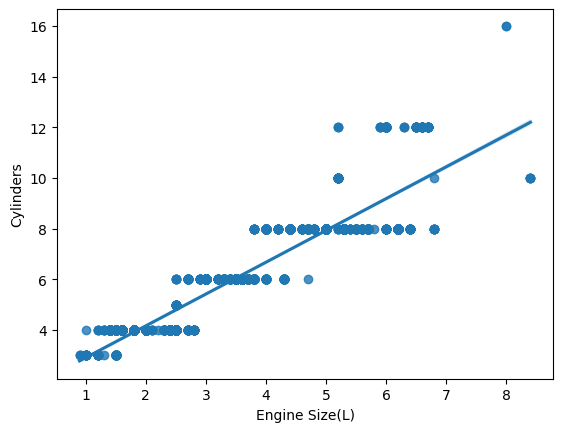

In [45]:
sns.regplot(x = "Engine Size(L)", y = "Cylinders", data= df2)

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption City (L/100 km)'>

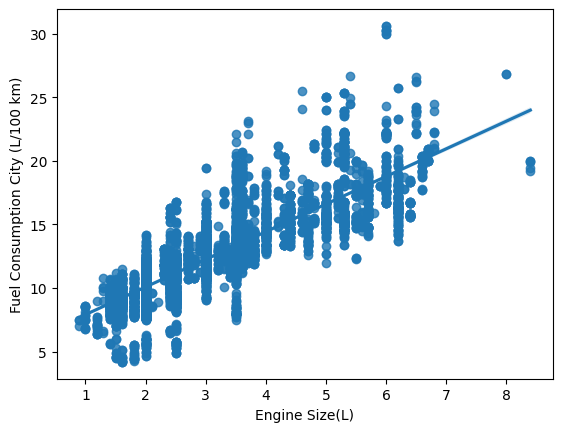

In [47]:
sns.regplot(x = "Engine Size(L)", y = 'Fuel Consumption City (L/100 km)', data= df2)

In [ ]:
X1 = Engine size (L), Cylinders, fuel consumption city, fuel consumption HWY,
  fuel consumption comb
Y = Engine size (L), Cylinders, fuel consumption city, fuel consumption HWY,
  fuel consumption comb

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption Hwy (L/100 km)'>

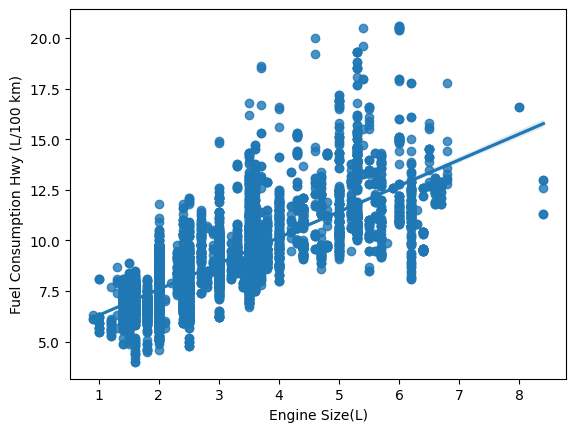

In [48]:
sns.regplot(x="Engine Size(L)", y="Fuel Consumption Hwy (L/100 km)", data= df2)

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Fuel Consumption Comb (L/100 km)'>

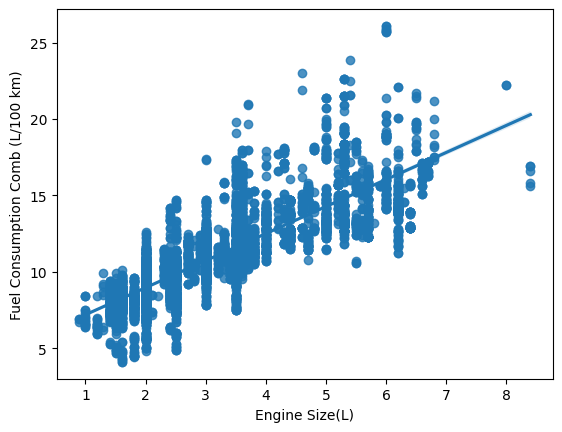

In [49]:
sns.regplot(x="Engine Size(L)", y="Fuel Consumption Comb (L/100 km)", data= df2)

# **Cylinders** best match graphs

<AxesSubplot:xlabel='Cylinders', ylabel='Engine Size(L)'>

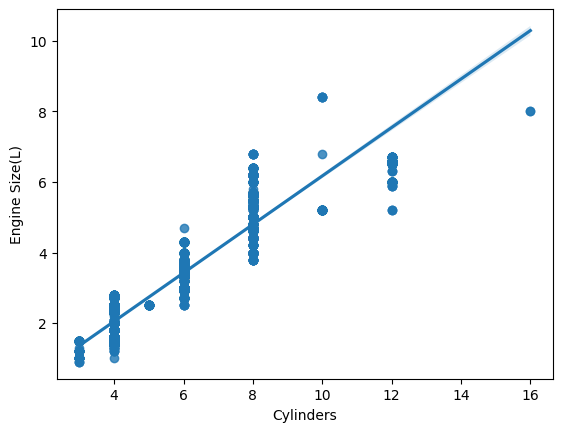

In [50]:
sns.regplot(y = "Engine Size(L)", x = "Cylinders", data= df2)

<AxesSubplot:xlabel='Cylinders', ylabel='Fuel Consumption City (L/100 km)'>

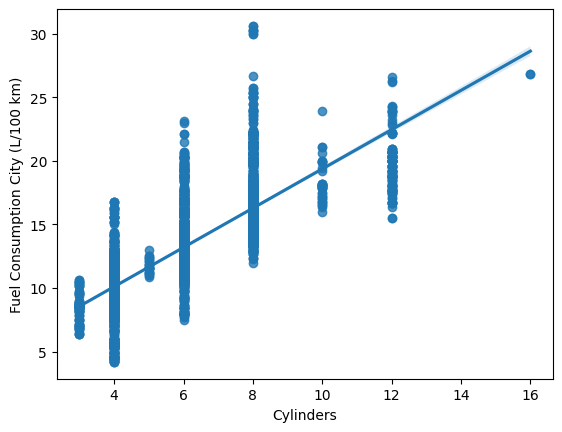

In [54]:
sns.regplot(x = "Cylinders", y = 'Fuel Consumption City (L/100 km)', data= df2)

<AxesSubplot:xlabel='Cylinders', ylabel='Fuel Consumption Hwy (L/100 km)'>

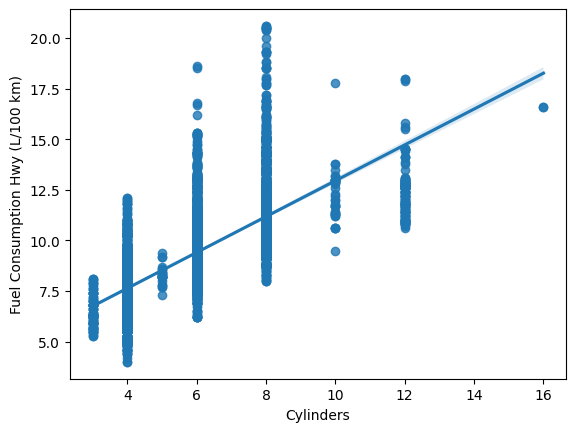

In [56]:

sns.regplot(x = "Cylinders", y = 'Fuel Consumption Hwy (L/100 km)', data= df2)

<AxesSubplot:xlabel='Cylinders', ylabel='Fuel Consumption Comb (L/100 km)'>

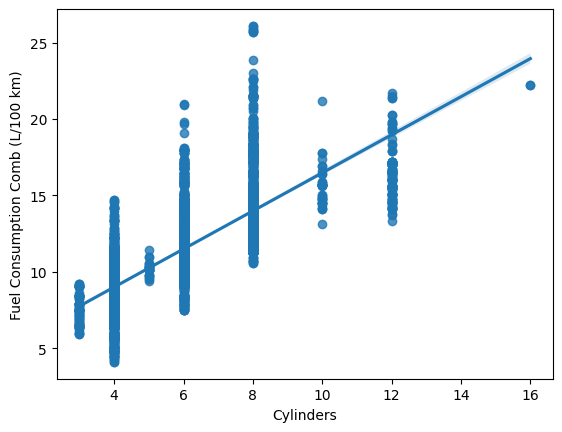

In [58]:
sns.regplot(x = "Cylinders", y = 'Fuel Consumption Comb (L/100 km)', data= df2)

# **Fuel Consumption City** best match graphs

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Engine Size(L)'>

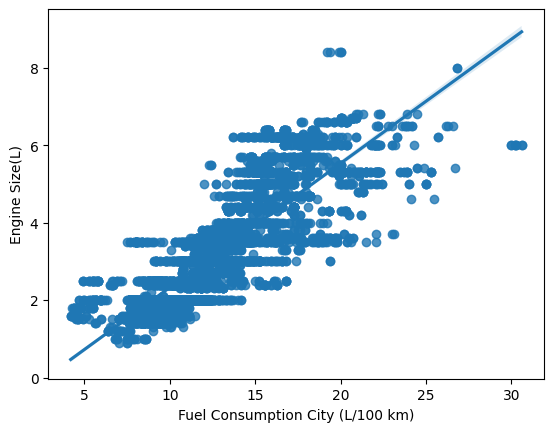

In [60]:
sns.regplot(y = "Engine Size(L)", x = "Fuel Consumption City (L/100 km)", data= df2)

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Cylinders'>

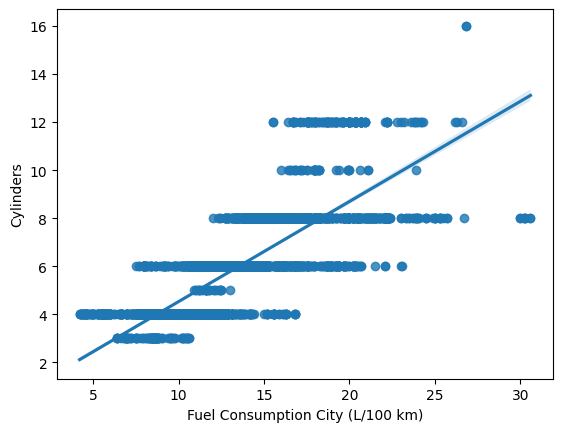

In [61]:
sns.regplot(x = "Fuel Consumption City (L/100 km)", y = "Cylinders", data= df2)

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Fuel Consumption Hwy (L/100 km)'>

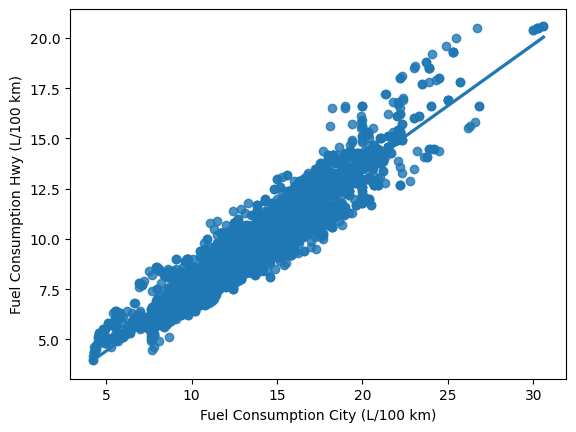

In [62]:
sns.regplot(x="Fuel Consumption City (L/100 km)", y="Fuel Consumption Hwy (L/100 km)", data= df2)

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Fuel Consumption Comb (L/100 km)'>

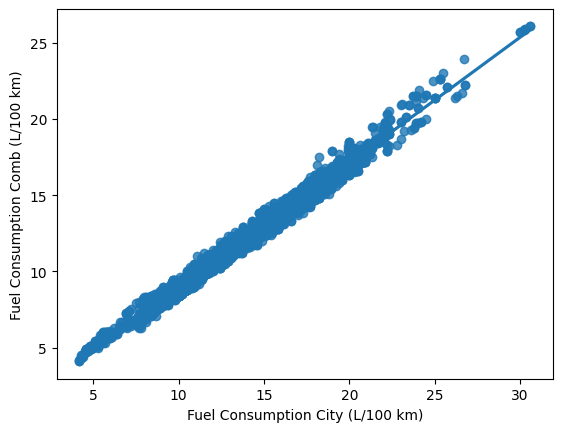

In [63]:
sns.regplot(x="Fuel Consumption City (L/100 km)", y="Fuel Consumption Comb (L/100 km)", data= df2)

# **Fuel Consumption HWY** best match graphs

In [ ]:
sns.regplot(y = "Engine Size(L)", x = "Fuel Consumption Hwy (L/100 km)", data= df2)

In [ ]:
sns.regplot(x = "Fuel Consumption Hwy (L/100 km)", y = "Cylinders", data= df2)

In [ ]:
sns.regplot(x="Fuel Consumption Hwy (L/100 km)", y="Fuel Consumption Comb (L/100 km)", data= df2)

In [ ]:
sns.regplot(y="Fuel Consumption City (L/100 km)", x="Fuel Consumption Hwy (L/100 km)", data= df2)

# **Fuel Consumption Comb (L/100 km)** best match graphs

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Engine Size(L)'>

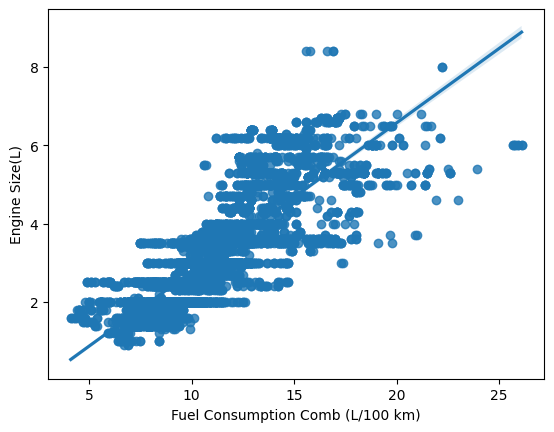

In [64]:
sns.regplot(y = "Engine Size(L)", x = "Fuel Consumption Comb (L/100 km)", data= df2)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Cylinders'>

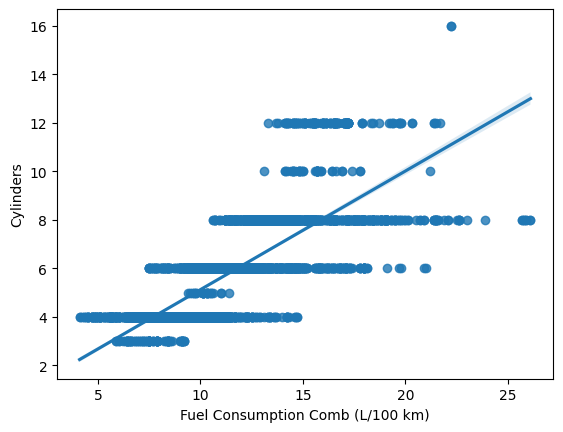

In [65]:
sns.regplot(x = "Fuel Consumption Comb (L/100 km)", y = "Cylinders", data= df2)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Fuel Consumption Hwy (L/100 km)'>

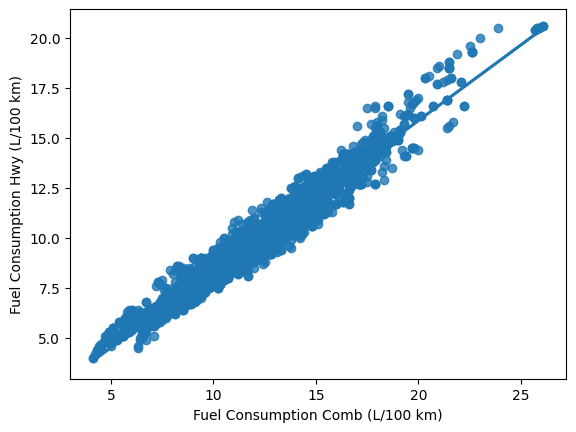

In [66]:
sns.regplot(y="Fuel Consumption Hwy (L/100 km)", x="Fuel Consumption Comb (L/100 km)", data= df2)

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Fuel Consumption City (L/100 km)'>

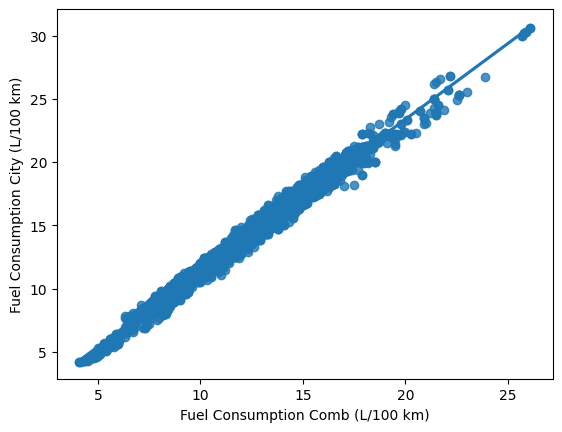

In [67]:
sns.regplot(y="Fuel Consumption City (L/100 km)", x="Fuel Consumption Comb (L/100 km)", data= df2)

output

In [31]:
df2.to_csv('data_processed.csv', index=False) 